In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import numpy as np
import pandas as pd
import os
import pickle
import cv2
import matplotlib.pyplot as plt

In [21]:
path = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /model'
os.listdir(path)

['deploy.prototxt.txt',
 'urls.txt',
 'dlib_face_recognition_resnet_model_v1.dat',
 'deploy.prototxt',
 'opencv_face_detector.pbtxt',
 'shape_predictor_68_face_landmarks.dat',
 'res10_300x300_ssd_iter_140000_fp16.caffemodel',
 'openface.nn4.small2.v1.t7',
 'opencv_face_detector_uint8.pb']

In [22]:
# Tai cac model
faceDetectionModel = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /model/res10_300x300_ssd_iter_140000_fp16.caffemodel'
# Mo ta kien chuc
faceDetectionProto = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /model/deploy.prototxt.txt'
# Mo ta khuon mat
faceDescriptor = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /model/openface.nn4.small2.v1.t7'

# Su dung opencv DNN doc mo hinh nhan dien khuon mat
dectectorModel = cv2.dnn.readNetFromCaffe(faceDetectionProto, faceDetectionModel)

# Su dung mo hinh mo ta khuon mat tu file Torch
descriptor_model = cv2.dnn.readNetFromTorch(faceDescriptor)

In [23]:
# Danh sách hình ảnh chuẩn bị
faces = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces'
os.listdir(faces)

['Quan', 'Hai_Minh', 'Nam']

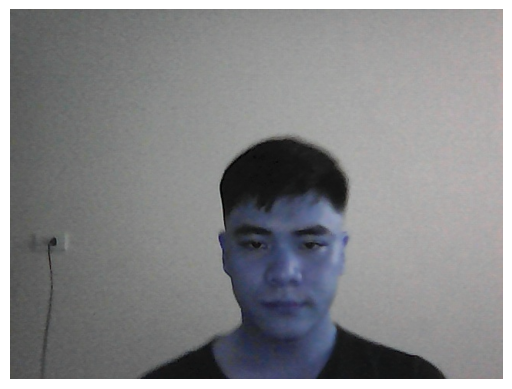

In [27]:
imgQuan = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_1.jpg'
img = cv2.imread(imgQuan)
plt.imshow(img)
plt.axis('off')
plt.show()

In [33]:
# Trich xuat dac trung cua anh
path = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_1.jpg'
img1 = cv2.imread(path)

# Copy cai anh
image = img1.copy()

# Lay chieu cao va chieu rong cua anh
h,w = image.shape[:2]

# Chuẩn bị dữ liệu đầu vào mô hình nhận
imgBlob = cv2.dnn.blobFromImage(image,1,(300,300),(104, 177, 123,), swapRB=False, crop=False)

# Thiết lập đầu vào cho mô hình
dectectorModel.setInput(imgBlob)

# Thực hiện việc nhận diện khuôn mặt
detections = dectectorModel.forward()

# Kiểm tra xem có khuôn mặt nào hay không
if (len(detections)>0):
  # chọn khuôn mặt có độ tin cậy cao nhất
  i = np.argmax(detections[0,0,:,2]) # Gia tri thu 2 trong 7 gia tri cuoi cung
  confidence = (detections[0,0,i,2])

  # Kiểm tra độ tin cậy lớn hơn 0.5
  if (confidence>0.5):
    # Tính toán hộp bao quanh khuôn mặt
    box = detections[0,0,i,3:7]*np.array([w,h,w,h])
    (startX, startY, endX, endY) = box.astype('int')

    # Trích suất vùng ảnh chứa khuôn mặt ra
    # roi = image[startY:endY, startX:endX]
    # plt.imshow(roi)
    # plt.axis('off')
    # plt.show()

    # Chuẩn bị dữ liệu đầu cho mô hình trích xuất đặc trưng
    faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96, 96), (0, 0, 0), swapRB=True, crop=True)

    # Thiết lập đầu vào cho mô hình
    descriptor_model.setInput(faceBlob)

    # Thực hiện việc trích xuất đặc trưng
    vectors = descriptor_model.forward()

    #Print Vector
    print(vectors)

[[-6.90585235e-03  2.26396486e-01 -3.17215323e-02  5.02237640e-02
  -1.08002640e-01  1.92077085e-01  4.04020287e-02 -1.25846148e-01
  -1.38938017e-02  5.91782480e-02  7.25764185e-02  1.68971960e-02
   6.98334351e-02 -8.01411346e-02 -8.25992078e-02 -8.29346851e-02
  -5.27207032e-02  1.26652792e-01 -5.24521433e-02 -1.87007468e-02
   4.40768637e-02 -9.26290751e-02 -2.49723643e-02  3.76555435e-02
   3.35568050e-03 -6.17070571e-02 -1.20242558e-01 -6.68991283e-02
  -6.70599705e-03  1.34263024e-01  2.08282694e-02  1.53377220e-01
  -3.71934064e-02  1.30955502e-01  2.06244253e-02 -3.22197489e-02
   6.31390363e-02  8.54437649e-02  8.60235319e-02 -1.10033150e-04
   1.18251157e-03 -1.84876218e-01  5.98066635e-02 -6.24623112e-02
  -6.19300269e-02 -1.87044203e-01  1.03511758e-01 -3.06146569e-03
  -1.43706352e-01  6.87452406e-02  1.33936197e-01  5.80660105e-02
  -1.81645714e-02  8.50782320e-02  1.05425417e-02  8.64421874e-02
   3.09183858e-02 -1.22877406e-02 -2.62506902e-02 -1.11068465e-01
  -7.23359

In [35]:
# Tạo ra 1 funcstions để áp dụng cho nhiều ảnh
def mydetect(image_path):
  # Trich xuat dac trung cua anh
  path = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_1.jpg'
  img1 = cv2.imread(path)

  # Copy cai anh
  image = img1.copy()

  # Lay chieu cao va chieu rong cua anh
  h,w = image.shape[:2]

  # Chuẩn bị dữ liệu đầu vào mô hình nhận
  imgBlob = cv2.dnn.blobFromImage(image,1,(300,300),(104, 177, 123,), swapRB=False, crop=False)

  # Thiết lập đầu vào cho mô hình
  dectectorModel.setInput(imgBlob)

  # Thực hiện việc nhận diện khuôn mặt
  detections = dectectorModel.forward()

  # Kiểm tra xem có khuôn mặt nào hay không
  if (len(detections)>0):
    # chọn khuôn mặt có độ tin cậy cao nhất
    i = np.argmax(detections[0,0,:,2]) # Gia tri thu 2 trong 7 gia tri cuoi cung
    confidence = (detections[0,0,i,2])

    # Kiểm tra độ tin cậy lớn hơn 0.5
    if (confidence>0.5):
      # Tính toán hộp bao quanh khuôn mặt
      box = detections[0,0,i,3:7]*np.array([w,h,w,h])
      (startX, startY, endX, endY) = box.astype('int')

      # Trích suất vùng ảnh chứa khuôn mặt ra
      roi = image[startY:endY, startX:endX]
      plt.imshow(roi)
      plt.axis('off')
      plt.show()

      # Chuẩn bị dữ liệu đầu cho mô hình trích xuất đặc trưng
      faceBlob = cv2.dnn.blobFromImage(roi, 1/255, (96, 96), (0, 0, 0), swapRB=True, crop=True)

      # Thiết lập đầu vào cho mô hình
      descriptor_model.setInput(faceBlob)

      # Thực hiện việc trích xuất đặc trưng
      vectors = descriptor_model.forward()

      #Print Vector
      return vectors

In [37]:
# Khởi tạo một dictionary
data = dict(data=[], label=[])

# Đường dẫn đến thư mục chứa các thư mục con chứa ảnh khuôn mặt
myDir = '/content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces'
folders = os.listdir(myDir)

# Duyệt qua từng thư mục con
for folder in folders:
    path = os.path.join(myDir, folder)
    print(f"Đang xử lý thư mục {folder}...")

    # Lấy danh sách các tệp trong thư mục con
    files = os.listdir(path)

    # Duyệt qua từng tệp
    for fileName in files:
        try:
            # Đường dẫn đến tệp ảnh
            imagePath = os.path.join(path, fileName)

            # Đọc ảnh
            img = cv2.imread(imagePath)

            # Gọi hàm trích xuất đặc trưng
            vector = mydetect(img)

            # Kiểm tra việc trích xuất đặc trưng có thành công hay không
            if vector is not None:
                # Thêm vector đặc trưng vào từ điển với nhãn là tên thư mục
                data['data'].append(vector)
                data['label'].append(folder)
                print(f"Trích xuất đặc trưng từ {imagePath} thành công")
        except Exception as e:
            print(f"Lỗi khi xử lý {imagePath}: {str(e)}")
            pass

print("Hoàn thành việc trích xuất đặc trưng cho tất cả các hình ảnh.")

Đang xử lý thư mục Quan...
Trích xuất đặc trưng từ /content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_102.jpg thành công
Trích xuất đặc trưng từ /content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_10.jpg thành công
Trích xuất đặc trưng từ /content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_101.jpg thành công
Trích xuất đặc trưng từ /content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_1.jpg thành công
Trích xuất đặc trưng từ /content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_100.jpg thành công
Trích xuất đặc trưng từ /content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuôn mặt /faces/Quan/image_135.jpg thành công
Trích xuất đặc trưng từ /content/drive/MyDrive/Thị Giác Máy tính/Trích xuất đặc trưng khuo

In [38]:
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [39]:
data.keys()

dict_keys(['data', 'label'])

In [45]:
# Tạo một series từ dictionary
labels = pd.Series(data['label'])
# Đếm số lần xuất hiện theo nhãn
labelCount = labels.value_counts()
print(labelCount)

Hai_Minh    635
Nam         627
Quan        588
Name: count, dtype: int64


In [48]:
path = '/content/drive/MyDrive/Thị Giác Máy tính/model_code_dac_trung'
# Tạo thư mục nếu nó chưa tồn tại
if not os.path.exists(path):
    os.makedirs(path)

# Lưu dữ liệu vào tệp tin
pickle.dump(data, open(path + '/data_face_features.pickle', 'wb'))

print("Dữ liệu đã được lưu vào tệp tin:", path + '/data_face_features.pickle')

Dữ liệu đã được lưu vào tệp tin: /content/drive/MyDrive/Thị Giác Máy tính/model_code_dac_trung/data_face_features.pickle
